In [14]:
from itertools import combinations
import pandas as pd
import numpy as np
import json

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'

#specify the style
# plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.size'] = 15

# Set x axis
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

# # Set y axis
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1


# # Fontsizes
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.title_fontsize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

# Set line widths
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

#set title size
plt.rcParams['figure.titlesize'] = 20

load the data

In [16]:
f = open('emimtf2n_FIM_info/PR_quadTdep.json')

data = json.load(f)

In [17]:
#record FIM of all samples
FIM_all_sample = []

for i in range(27):
    FIM_i = np.array(data[0][str(i)])
    FIM_all_sample.append(FIM_i/1e10)

#define the number of samples
n = 27

define the combination procedure

In [18]:
#demo for single combination, k

#define combination number k
# k = 2

def FIM_of_combination_k(k, return_exp=False):
    '''
        calculate the FIM of certain combination n,k
    Arguments:
        k: number of samples select out
    Returns:
        det(FIM)
    '''
    comb = combinations(range(0,n), k)

    #define list to record calculation of FIM
    det_FIM_single_k = []

    #calculate the FIM of the combination
    for i in list(comb):
        # print(i)
        # print(np.array(FIM_all_sample)[list(i)])
        # print(np.array(FIM_all_sample)[list(i)].shape)
        
        #adds up the FIM matrix
        FIM_single_k = np.array(FIM_all_sample)[list(i)].sum(axis=0)

        #calculate and record the det of FIM matrix
        det_FIM_single_k.append(np.linalg.det(FIM_single_k))
    # print(np.max(det_FIM_single_k))
    
    if return_exp:
        # print(np.argmax(det_FIM_single_k))
        return np.argmax(det_FIM_single_k), np.max(det_FIM_single_k)
    else:
        return np.max(det_FIM_single_k)

sanity check

In [20]:
#using all data, n=27, Jialu report the det (FIM) = 11.499656
FIM_of_combination_k(n)

#sanity check passed

11.499656174850019

conduct number of experiment calculation and save

In [6]:
# det_FIM_all_k = []

# for k in range(0, n+1):
    # det_FIM_all_k.append(FIM_of_combination_k(k))

In [7]:
# np.savetxt("det_FIM_data.csv", det_FIM_all_k, delimiter=",")

load the number of experiment calculation file

In [21]:
det_FIM_all_k = np.loadtxt('det_FIM_data.csv')

In [22]:
det_FIM_all_k

array([0.00000000e+00, 9.61829674e-67, 5.95715620e-50, 1.05582621e-35,
       5.05553661e-23, 5.99491568e-12, 3.32991977e-02, 9.01974647e-02,
       1.73753698e-01, 2.94907413e-01, 4.68035744e-01, 7.01140879e-01,
       1.01202106e+00, 1.43599959e+00, 1.98009367e+00, 2.65454359e+00,
       3.51544748e+00, 4.44254542e+00, 5.35698636e+00, 6.29845497e+00,
       7.38895583e+00, 8.46128490e+00, 9.38570710e+00, 1.01557294e+01,
       1.06989533e+01, 1.10492553e+01, 1.12862824e+01, 1.14996562e+01])

det_FIM_all_k

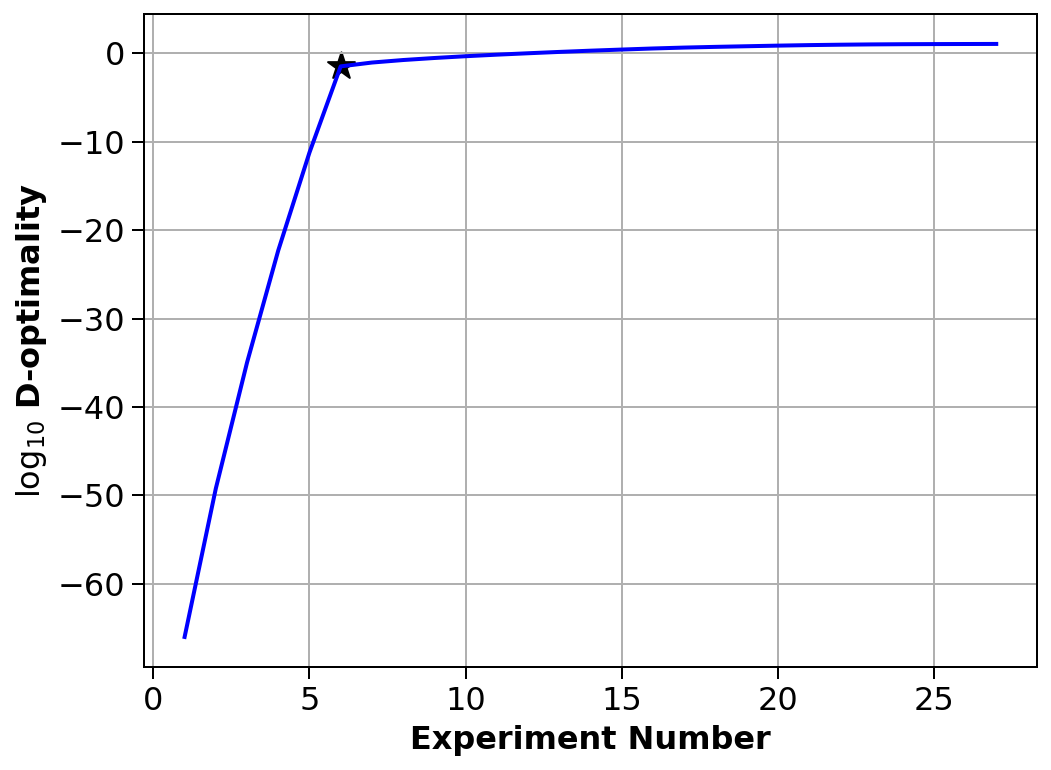

In [23]:
plt.plot(range(1, n+1), np.log10(det_FIM_all_k[1:]), c='b')
plt.scatter(6, np.log10(det_FIM_all_k[1:])[5], s=200, c='k', marker='*')
plt.ylabel(r'$\mathrm{log}_{10}$ D-optimality')
plt.xlabel(r'Experiment Number')
# plt.vlines(6, 0, 75, color='k', linestyles='dotted')
# plt.ylim(0, 75)
plt.grid()

In [21]:
det_FIM_all_k

array([0.00000000e+00, 9.61829674e-67, 5.95715620e-50, 1.05582621e-35,
       5.05553661e-23, 5.99491568e-12, 3.32991977e-02, 9.01974647e-02,
       1.73753698e-01, 2.94907413e-01, 4.68035744e-01, 7.01140879e-01,
       1.01202106e+00, 1.43599959e+00, 1.98009367e+00, 2.65454359e+00,
       3.51544748e+00, 4.44254542e+00, 5.35698636e+00, 6.29845497e+00,
       7.38895583e+00, 8.46128490e+00, 9.38570710e+00, 1.01557294e+01,
       1.06989533e+01, 1.10492553e+01, 1.12862824e+01, 1.14996562e+01])

In [ ]:
det_FIM_all_k[1:]

determine the experiment

In [ ]:
for i in range(4,9):
    index, _ = FIM_of_combination_k(i,return_exp=True)
    comb = combinations(range(0,n), i)

    #calculate the FIM of the combination
    print('proposed experiment for ' + str(i) + ' of experiment: ', list(comb)[index])